In [3]:
from BMI203_final_project import neuralnet
from BMI203_final_project import io
import numpy as np
import random
from scipy.interpolate import make_interp_spline, BSpline
import matplotlib.pyplot as plt
import time

#net = neuralnet.Network([8,3,8])

In [7]:
#Read in pos_sequences
pos_sequences = io.read_sequences('/Users/elizabeth/Desktop/BMI203_final_project/data/rap1-lieb-positives.txt')
#Add reverse complement fo neg sequences
pos_sequences = io.reverse_complement(pos_sequences)
#Make list of only sequences without meta info
seq = [x[0] for x in pos_sequences]

In [16]:
pos_sequences = io.read_sequences('/Users/elizabeth/Desktop/BMI203_final_project/data/rap1-lieb-positives.txt')

In [20]:
pos_sequences = io.reverse_complement(pos_sequences)

In [24]:
pos_sequences[137] #len(pos_sequences)//2

['CGGAGGTGCACGGATGT',
 1,
 0.17647058823529413,
 0.17647058823529413,
 0.47058823529411764,
 0.17647058823529413]

In [19]:
pos_sequences[0][0]

'ACATCCGTGCACCTCCG'

In [8]:
#Read in negative sequences and split up into 17 bp long sub sequences
neg_sequences = io.read_neg_sequences('/Users/elizabeth/Desktop/BMI203_final_project/data/yeast-upstream-1k-negative.fa')

In [6]:
len(neg_sequences)

3109229

In [9]:
#Remove all sequences that match orig pos_seq or their complement
neg_sequences = io.Diff(neg_sequences, seq)

In [10]:
len(neg_sequences)

2979026

In [11]:
#Number of removed sequences
3109229- 2979026

130203

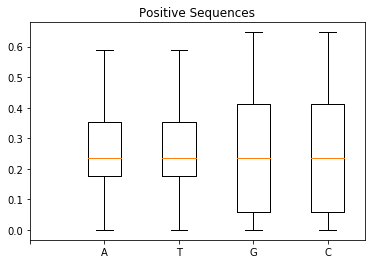

In [103]:
#Check distribution of bases in each set of sequences
#Positive sequences
num_a = [x[2] for x in pos_sequences]
num_t = [x[3] for x in pos_sequences]
num_g = [x[4] for x in pos_sequences]
num_c = [x[5] for x in pos_sequences]
data = [num_a,num_t,num_g,num_c]
# Multiple box plots on one Axes
fig, ax = plt.subplots()
ax.boxplot(data)
bars = ('','A', 'T', 'G', 'C')
y_pos = np.arange(len(bars))
plt.title("Positive Sequences")
plt.xticks(y_pos, bars)

plt.show()


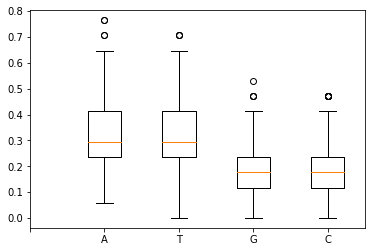

In [19]:
#Choose equal number of neg sequences
neg_sequence_subset = random.sample(neg_sequences, len(pos_sequences))
num_a = [x.count('A')/len(x) for x in neg_sequence_subset]
num_t = [x.count('T')/len(x) for x in neg_sequence_subset]
num_g = [x.count('G')/len(x) for x in neg_sequence_subset]
num_c = [x.count('C')/len(x) for x in neg_sequence_subset]
data = [num_a,num_t,num_g,num_c]

# Multiple box plots on one Axes
fig, ax = plt.subplots()
ax.boxplot(data)
bars = ('','A', 'T', 'G', 'C')
y_pos = np.arange(len(bars))

plt.xticks(y_pos, bars)

plt.show()
#Pretty different distribution so let's try to match the distributions 

In [19]:
x = [0.3,0.5, 1.8]
[round(i) for i in x]


[0, 0, 2]

In [17]:
round(147*0.1)

15

In [64]:

#Add meta data to neg sequences
neg_sequences_info = [[x, 0,x.count('A')/len(x), x.count('T')/len(x), x.count('G')/len(x), x.count('C')/len(x)] for x in neg_sequences[1:]]
#Add in reverse complement sequences
neg_sequences_info = io.reverse_complement(neg_sequences_info)




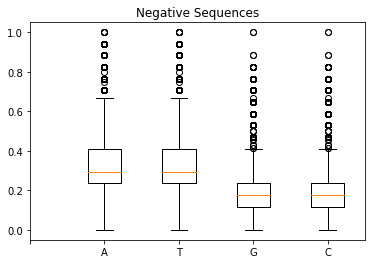

In [102]:
#Negative sequences
num_a = [x[2] for x in neg_sequences_info ]
num_t = [x[3] for x in neg_sequences_info ]
num_g = [x[4] for x in neg_sequences_info ]
num_c = [x[5] for x in neg_sequences_info ]
data = [num_a,num_t,num_g,num_c]
# Multiple box plots on one Axes
fig, ax = plt.subplots()
ax.boxplot(data)
bars = ('','A', 'T', 'G', 'C')
y_pos = np.arange(len(bars))
plt.title("Negative Sequences")
plt.xticks(y_pos, bars)

plt.show()

In [119]:
test = [np.sum(np.square(np.array(x[2:6]) - np.array(pos_sequences[0][2:6]))) for x in neg_sequences_info]

In [ ]:
neg_sequences_holder = neg_sequences_info

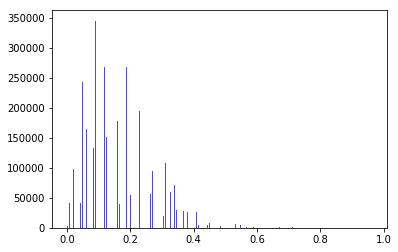

In [120]:
plt.hist(test, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.show()

In [126]:
neg_sequences_holder = neg_sequences_info

In [129]:
start = time.time()
neg_sequences_subset = []
for pos_seq in pos_sequences:
    d = 1
    for neg_seq in neg_sequences_holder:
        d = np.sum(np.square(np.array(neg_seq[2:6]) - np.array(pos_seq[2:6])))
        if d == 0:
            neg_sequences_subset.append(neg_seq)
            neg_sequences_holder.remove(neg_seq)
            break
        else:
            continue
end = time.time()
print((end-start)/60)

0.5551857352256775


In [134]:
#Make sure there is no overlap with the positive sequences
pos_test = [x[0] for x in pos_sequences]
neg_test = [x[0] for x in neg_sequences_subset]
test = io.Diff(neg_test, pos_test)
len(test)

274

In [131]:
#Make sure all the negative sequences are unique
print(len(np.unique([x[0] for x in neg_sequences_subset])))


274

In [4]:
pos_pairs = io.read_sequences('data/rap1-lieb-positives.txt')
pos_pairs = io.reverse_complement(pos_pairs)
pos_input = io.convert_to_numeric(pos_pairs)
neg_pairs = np.load("neg_sequences.npy")
neg_input = io.convert_to_numeric(neg_pairs)
training_input = pos_input + neg_input

In [5]:
net = neuralnet.Network([68,34,1])
net.SGD(training_input,300,10,1)
output = net.output(neg_pairs)

Epochs complete in: 0.07100626230239868  min


ValueError: too many values to unpack (expected 2)

In [9]:
test_data = [[np.array([[1,0,0,0,0,0,0,0]]).T,np.array([[1,0,0,0,0,0,0,0]]).T],
                 [np.array([[0,1,0,0,0,0,0,0]]).T,np.array([[0,1,0,0,0,0,0,0]]).T],
                [np.array([[0,0,1,0,0,0,0,0]]).T,np.array([[0,0,1,0,0,0,0,0]]).T],
                [np.array([[0,0,0,1,0,0,0,0]]).T,np.array([[0,0,0,1,0,0,0,0]]).T],
                [np.array([[0,0,0,0,1,0,0,0]]).T,np.array([[0,0,0,0,1,0,0,0]]).T],
                [np.array([[0,0,0,0,0,1,0,0]]).T,np.array([[0,0,0,0,0,1,0,0]]).T],
                [np.array([[0,0,0,0,0,0,1,0]]).T,np.array([[0,0,0,0,0,0,1,0]]).T],
                [np.array([[0,0,0,0,0,0,0,1]]).T,np.array([[0,0,0,0,0,0,0,1]]).T]]

In [10]:
unsorted_test = test_data
net = neuralnet.Network([8,3,8])
net.SGD(test_data,300,1,1)
output = net.evaluate_8_3_8(unsorted_test)
   

Epochs complete in: 0.005001779397328695  min


In [12]:
unsorted_test

[[array([[0],
         [0],
         [0],
         [0],
         [1],
         [0],
         [0],
         [0]]), array([[0],
         [0],
         [0],
         [0],
         [1],
         [0],
         [0],
         [0]])], [array([[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]]), array([[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]])], [array([[0],
         [0],
         [0],
         [1],
         [0],
         [0],
         [0],
         [0]]), array([[0],
         [0],
         [0],
         [1],
         [0],
         [0],
         [0],
         [0]])], [array([[0],
         [0],
         [0],
         [0],
         [0],
         [1],
         [0],
         [0]]), array([[0],
         [0],
         [0],
         [0],
         [0],
         [1],
         [0],
         [0]])], [array([[1],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0]

In [8]:
neg_pairs[0]

array(['CCGCCCATGTCTACCAG', '0', '0.17647058823529413',
       '0.17647058823529413', '0.17647058823529413',
       '0.47058823529411764'], dtype='<U20')

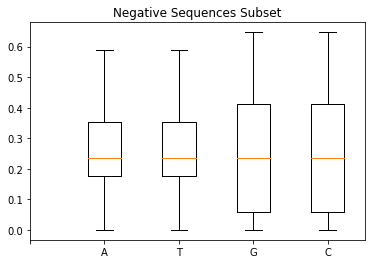

In [136]:
#Negative sequences
num_a = [x[2] for x in neg_sequences_subset]
num_t = [x[3] for x in neg_sequences_subset]
num_g = [x[4] for x in neg_sequences_subset]
num_c = [x[5] for x in neg_sequences_subset]
data = [num_a,num_t,num_g,num_c]
# Multiple box plots on one Axes
fig, ax = plt.subplots()
ax.boxplot(data)
bars = ('','A', 'T', 'G', 'C')
y_pos = np.arange(len(bars))
plt.title("Negative Sequences Subset")
plt.xticks(y_pos, bars)

plt.show()

In [164]:
#np.save("neg_sequences.npy", neg_sequences_subset)
#np.save("pos_sequences.npy", pos_sequences)

In [1]:
from BMI203_final_project import neuralnet
from BMI203_final_project import io
import numpy as np
import random
from scipy.interpolate import make_interp_spline, BSpline
import matplotlib.pyplot as plt
import time
test = np.load("neg_sequences.npy")
test_2 = np.load("pos_sequences.npy")
pos_input = io.convert_to_numeric(test_2)
neg_input = io.convert_to_numeric(test)
training_input = pos_input + neg_input

In [2]:
test = np.load("neg_sequences.npy")
test_2 = np.load("pos_sequences.npy")
pos_input = io.convert_to_numeric(test_2)
neg_input = io.convert_to_numeric(test)
training_input = pos_input + neg_input


In [6]:
net = neuralnet.Network([68,34,1])


Epochs complete in: 0.0640780488650004  min


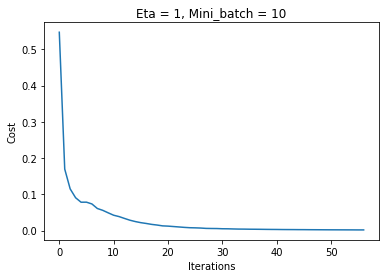

In [7]:

#Plot raw data
x_points = np.array(list(range(len(net.cost_overall))))
y_points = np.array(net.cost_overall)
plt.plot(x_points,y_points)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Eta = 1, Mini_batch = 10")
plt.show()

Epochs complete in: 0.15925861597061158  min


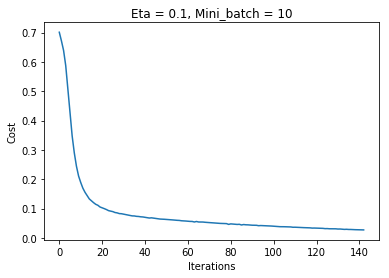

In [8]:
net = neuralnet.Network([68,34,1])
eta = 0.1
iterations = 300
net.SGD(training_input,iterations,10,eta)
#Plot raw data
x_points = np.array(list(range(len(net.cost_overall))))
y_points = np.array(net.cost_overall)
plt.plot(x_points,y_points)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Eta = 0.1, Mini_batch = 10")
plt.show()

Epochs complete in: 0.04268706639607747  min


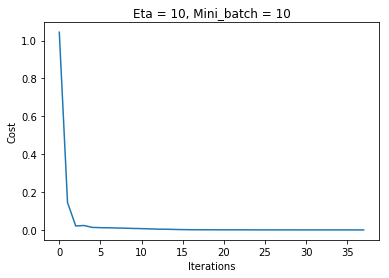

In [9]:
net = neuralnet.Network([68,34,1])
eta = 10
iterations = 300
net.SGD(training_input,iterations,10,eta)
#Plot raw data
x_points = np.array(list(range(len(net.cost_overall))))
y_points = np.array(net.cost_overall)
plt.plot(x_points,y_points)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Eta = 10, Mini_batch = 10")
plt.show()

Epochs complete in: 0.33044495185216266  min


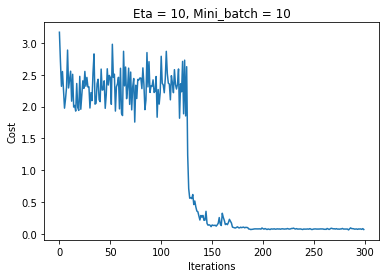

In [15]:
net = neuralnet.Network([68,34,1])
eta = 20
iterations = 300
net.SGD(training_input,iterations,10,eta)
#Plot raw data
x_points = np.array(list(range(len(net.cost_overall))))
y_points = np.array(net.cost_overall)
plt.plot(x_points,y_points)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Eta = 20, Mini_batch = 10")
plt.show()

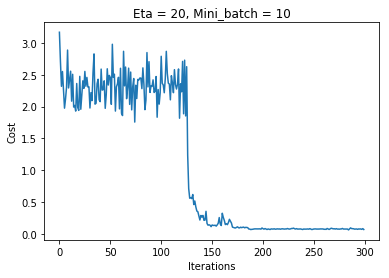

In [16]:
#Plot raw data
x_points = np.array(list(range(len(net.cost_overall))))
y_points = np.array(net.cost_overall)
plt.plot(x_points,y_points)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Eta = 20, Mini_batch = 10")
plt.show()

Epochs complete in: 0.021962054570515952  min


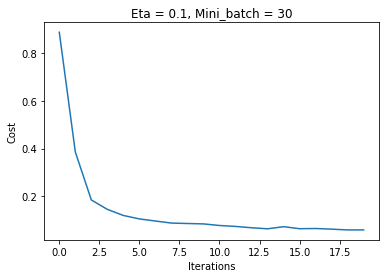

In [10]:
net = neuralnet.Network([68,34,1])
eta = 1
iterations = 300
net.SGD(training_input,iterations,30,eta)
#Plot raw data
x_points = np.array(list(range(len(net.cost_overall))))
y_points = np.array(net.cost_overall)
plt.plot(x_points,y_points)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Eta = 0.1, Mini_batch = 30")
plt.show()

Epochs complete in: 0.0373526136080424  min


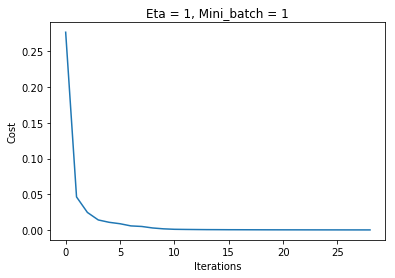

In [5]:
net = neuralnet.Network([68,34,1])
eta = 1
iterations = 300
net.SGD(training_input,iterations,1,eta)
#Plot raw data
x_points = np.array(list(range(len(net.cost_overall))))
y_points = np.array(net.cost_overall)
plt.plot(x_points,y_points)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Eta = 1, Mini_batch = 1")
plt.show()

Epochs complete in: 0.10698620080947877  min


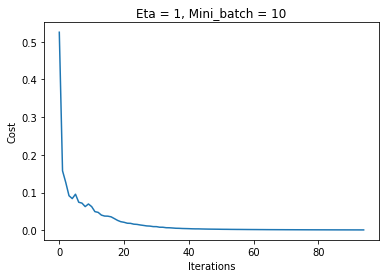

In [6]:
net = neuralnet.Network([68,34,1])
eta = 1
iterations = 300
net.SGD(training_input,iterations,10,eta)
#Plot raw data
x_points = np.array(list(range(len(net.cost_overall))))
y_points = np.array(net.cost_overall)
plt.plot(x_points,y_points)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Eta = 1, Mini_batch = 10")
plt.show()

Epochs complete in: 0.15337688525517781  min


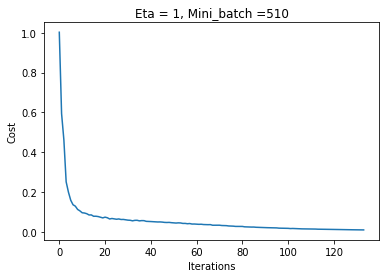

In [7]:
net = neuralnet.Network([68,34,1])
eta = 1
iterations = 300
net.SGD(training_input,iterations,50,eta)
#Plot raw data
x_points = np.array(list(range(len(net.cost_overall))))
y_points = np.array(net.cost_overall)
plt.plot(x_points,y_points)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Eta = 1, Mini_batch =50")
plt.show()

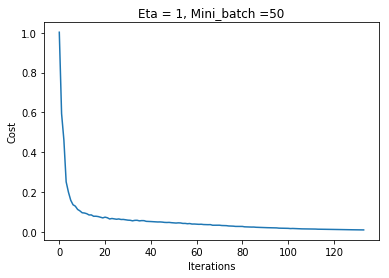

In [8]:
x_points = np.array(list(range(len(net.cost_overall))))
y_points = np.array(net.cost_overall)
plt.plot(x_points,y_points)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Eta = 1, Mini_batch =50")
plt.show()

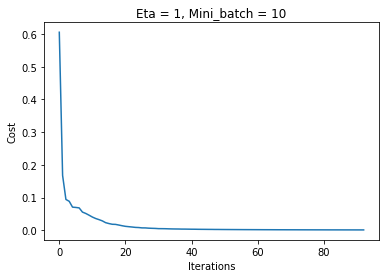

In [7]:

#Plot raw data
x_points = np.array(list(range(len(net.cost_overall))))
y_points = np.array(net.cost_overall)
plt.plot(x_points,y_points)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Eta = 1, Mini_batch = 10")
plt.show()

In [1]:
from BMI203_final_project import neuralnet
from BMI203_final_project import io
import numpy as np
import random
from scipy.interpolate import make_interp_spline, BSpline
import matplotlib.pyplot as plt
import time
test = np.load("neg_sequences.npy")
test_2 = np.load("pos_sequences.npy")
pos_input = io.convert_to_numeric(test_2)
neg_input = io.convert_to_numeric(test)
training_input = pos_input + neg_input
net = neuralnet.Network([68,34,1])

In [35]:
test = np.load("neg_sequences.npy")

In [37]:
test[0][0]

'CCGCCCATGTCTACCAG'

In [33]:
test[0][0]

'CCGCCCATGTCTACCAG'

In [2]:
#net = neuralnet.Network([68,34,1])
#SGD(self, training_data, epochs, mini_batch_size, eta)
eta = 1
iterations = 300
net.SGD(training_input,iterations,10,eta)


Epochs complete in: 0.0568030834197998  min


In [3]:
pos_output = net.output(pos_input)

In [5]:
pos_output

[['ACATCCGTGCACCTCCG', 0.9965135924315345],
 ['ACACCCAGACATCGGGC', 0.9999897184615608],
 ['CCACCCGTACCCATGAC', 0.9989233258729021],
 ['GCACCCATACATTACAT', 0.9999717839846696],
 ['ACATCCATACACCCTCT', 0.9998823072048139],
 ['ACACCCTTACACTTTTA', 0.9999889281466692],
 ['GCATCCGTGCCTCCCAC', 0.9947185257472491],
 ['AAACCCATGCACAGTGA', 0.9996358398257271],
 ['ACATCCGTGCACCATTT', 0.9999174957845482],
 ['ACACCCATACATACGGA', 0.9996865130124832],
 ['ACACCCACACCCCGGGC', 0.9995536059572956],
 ['ACCTCCGTACACCAATC', 0.9977770290575505],
 ['ACACCCATACATGTTGA', 0.9999931477948635],
 ['TGACCCATACATTTCCT', 0.9996155398337867],
 ['ACATCCGTACATCAGAA', 0.9999673969702315],
 ['AAACCCATACATATCTT', 0.9997827145391145],
 ['TCACCCAGTCATCCAAC', 0.9998378727235541],
 ['AGACCCACACACCGCAT', 0.999959730937151],
 ['TAGCCCATACACCGCAG', 0.9999142221817913],
 ['ACACCCACACCCCTCAT', 0.9998639280891845],
 ['ACACCCACGCCCCGCAA', 0.9992551977526519],
 ['GAACCCACACCTCTCAC', 0.999102729214677],
 ['GCACCCACACATCGCAT', 0.999978837

In [6]:
neg_output = net.output(neg_input)

In [7]:
neg_output

[['CCGCCCATGTCTACCAG', 9.087909144694921e-06],
 ['ACGACAGTCCCGGCACA', 0.019740391192596064],
 ['CTCGCCCCGACCTCAAA', 8.463374419485295e-12],
 ['CAAACTACCAGTCATTC', 6.53620191008626e-09],
 ['TACTACCACCACTACCT', 7.813567032481e-09],
 ['CTTCTTCCCTTACAAAA', 1.5471562770718872e-12],
 ['CCTCGCGTCACCATCCG', 3.484276422379581e-06],
 ['CGGGAAAACATATCACC', 2.663742296905264e-11],
 ['GCAGCATCATCATCTTC', 5.698108605599378e-07],
 ['ACCAATCTGACAACCAG', 5.792499578841115e-13],
 ['GCCCACCCAACCGCACG', 4.8175132715818875e-09],
 ['TCACCTACTCACACACG', 2.856633526209784e-07],
 ['TCTGAAAAGCCTCATCA', 1.0394076655157187e-08],
 ['ACAAACTCTTCTGCTTC', 0.0006171441345978606],
 ['GAAAGCACATCTTACAC', 7.872260590346084e-07],
 ['CATACAAATCCTTTCAA', 1.2830549278739047e-05],
 ['CCCACCACCTGATAATC', 7.2152193812728e-12],
 ['AAGCCCAATCCCACGCA', 0.00010104418745053305],
 ['TGAAGACCTCACCCACG', 7.08875756555243e-10],
 ['CCAACCCCACTACCACT', 2.3954232984986587e-07],
 ['ACGCCCCCCCCACAAGA', 9.231007265016275e-06],
 ['CACATCCCCTCA

In [9]:
test_sequences = io.read_sequences('/Users/elizabeth/Desktop/BMI203_final_project/data/rap1-lieb-test.txt')
test_input = io.convert_to_numeric(test_sequences)
test_output = net.output(test_input)
with open('predictions.txt', 'w') as file:
    for element in test_output:
        for word in element:
            file.write(word + '\t')
        file.write('\n')

TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('<U32') dtype('<U32') dtype('<U32')

In [15]:
with open('predictions.txt', 'w') as file:
    for element in test_output:
        file.write(element[0] + '\t')
        file.write(str(element[1]))
        file.write('\n')

In [2]:
net.cross_val(pos_input, neg_input, 100, 10, 1, 10)

Epochs complete in: 0.05202185312906901  min
Epochs complete in: 0.05605506499608358  min
Epochs complete in: 0.035814352830251056  min
Epochs complete in: 0.04802159468332926  min
Epochs complete in: 0.04897368351618449  min
Epochs complete in: 0.05223016341527303  min
Epochs complete in: 0.021243731180826824  min
Epochs complete in: 0.038855330149332686  min
Epochs complete in: 0.05601066748301188  min
Epochs complete in: 0.05304853518803914  min


In [3]:
net.accuracy

[0.9814814814814815, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [4]:
#cross_val(pos_data, neg_data, epochs, mini_batch_size, eta, k)
net.cross_val(pos_input, neg_input, 100, 10, 0.1, 10)
net.accuracy

Epochs complete in: 0.09682765404383341  min
Epochs complete in: 0.09057878653208415  min
Epochs complete in: 0.09044563372929891  min
Epochs complete in: 0.10301063458124797  min
Epochs complete in: 0.08271129926045735  min
Epochs complete in: 0.09340863227844239  min
Epochs complete in: 0.09984970092773438  min
Epochs complete in: 0.09361091852188111  min
Epochs complete in: 0.09178671836853028  min
Epochs complete in: 0.10117174784342448  min


[0.9444444444444444,
 1.0,
 1.0,
 0.9814814814814815,
 0.9814814814814815,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9444444444444444]

In [11]:
net = neuralnet.Network([68,10,1])
net.cross_val(pos_input, neg_input, 100, 10, 1, 10)
net.accuracy

Epochs complete in: 0.05523218313852946  min
Epochs complete in: 0.05639344851175944  min
Epochs complete in: 0.05988285144170125  min
Epochs complete in: 0.062310036023457846  min
Epochs complete in: 0.06031671365102132  min
Epochs complete in: 0.05707311232884725  min
Epochs complete in: 0.06071861584981283  min
Epochs complete in: 0.05308801333109538  min
Epochs complete in: 0.060480217138926186  min
Epochs complete in: 0.06059046983718872  min


[0.9814814814814815, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [3]:
net = neuralnet.Network([68,55,1])
net.cross_val(pos_input, neg_input, 100, 10, 1, 10)
net.accuracy

Epochs complete in: 0.05830237070719401  min
Epochs complete in: 0.06852320035298666  min
Epochs complete in: 0.03132534821828206  min
Epochs complete in: 0.06863660017649333  min
Epochs complete in: 0.06506690184275309  min
Epochs complete in: 0.0597046176592509  min
Epochs complete in: 0.058657900492350264  min
Epochs complete in: 0.011621681849161784  min
Epochs complete in: 0.060509649912516277  min
Epochs complete in: 0.03602474927902222  min


[0.9629629629629629,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9629629629629629]

8x3x8 encoder

In [4]:
test_data = [[np.array([[1,0,0,0,0,0,0,0]]).T,np.array([[1,0,0,0,0,0,0,0]]).T],
                 [np.array([[0,1,0,0,0,0,0,0]]).T,np.array([[0,1,0,0,0,0,0,0]]).T],
                [np.array([[0,0,1,0,0,0,0,0]]).T,np.array([[0,0,1,0,0,0,0,0]]).T],
                [np.array([[0,0,0,1,0,0,0,0]]).T,np.array([[0,0,0,1,0,0,0,0]]).T],
                [np.array([[0,0,0,0,1,0,0,0]]).T,np.array([[0,0,0,0,1,0,0,0]]).T],
                [np.array([[0,0,0,0,0,1,0,0]]).T,np.array([[0,0,0,0,0,1,0,0]]).T],
                [np.array([[0,0,0,0,0,0,1,0]]).T,np.array([[0,0,0,0,0,0,1,0]]).T],
                [np.array([[0,0,0,0,0,0,0,1]]).T,np.array([[0,0,0,0,0,0,0,1]]).T]]

In [1]:
from BMI203_final_project import neuralnet
from BMI203_final_project import io
import numpy as np
import random
from scipy.interpolate import make_interp_spline, BSpline
import matplotlib.pyplot as plt
import time
net_test = neuralnet.Network([8,3,8])

In [5]:
"""
epochs = 300
mini_batch_size = 1
eta = 0.1
reg = 1

"""
eta = 1
iterations = 300
net_test.SGD(test_data,iterations,1,eta)

Epochs complete in: 0.005112163225809733  min


In [8]:
net_test.evaluate_8_3_8(test_data)[0][0]

[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

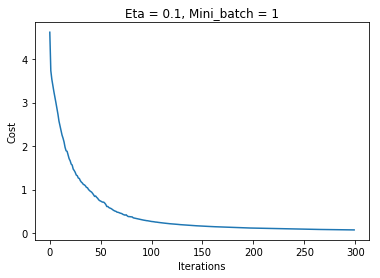

In [15]:
#Plot raw data
x_points = np.array(list(range(len(net_test.cost_overall))))
y_points = np.array(net_test.cost_overall)
plt.plot(x_points,y_points)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Eta = 0.1, Mini_batch = 1")
plt.show()

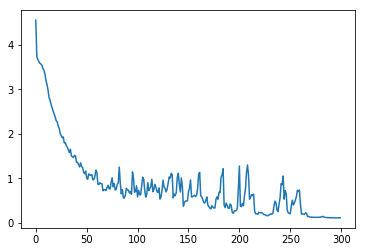

In [7]:

#Plot raw data
x_points = np.array(list(range(len(net.cost_overall))))
y_points = np.array(net.cost_overall)
plt.plot(x_points,y_points)
plt.show()